In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
df = pd.read_csv("wta_matches_qual_itf_1979.csv")
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1979-1005,Austin Futures,NaN,NaN,C,19790101,1,200758,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-1005,Austin Futures,NaN,NaN,C,19790101,2,200935,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-1005,Austin Futures,NaN,NaN,C,19790101,3,200369,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-1005,Austin Futures,NaN,NaN,C,19790101,4,200402,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-1005,Austin Futures,NaN,NaN,C,19790101,5,200862,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(273, 5)

In [24]:
df = df[[
    "winner_age",
    "loser_age",
    "best_of",
    "draw_size"
]]
df = df.dropna()
df["result"] = (df["winner_age"] < df["loser_age"]).astype(int)

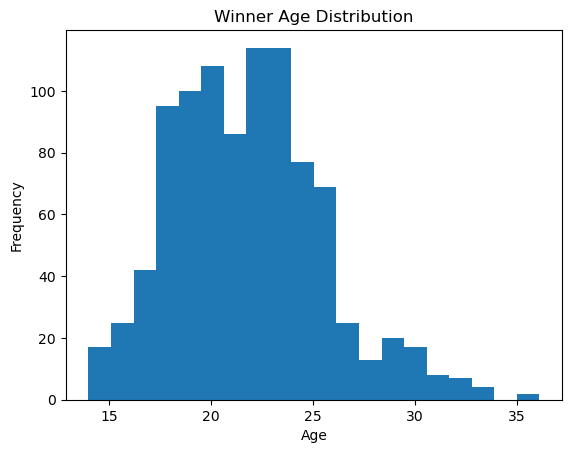

In [25]:
plt.figure()
plt.hist(data["winner_age"], bins=20)
plt.title("Winner Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


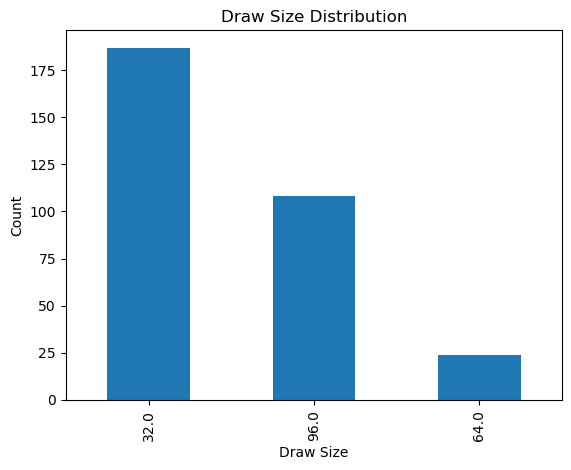

In [26]:
plt.figure()
data["draw_size"].value_counts().plot(kind="bar")
plt.title("Draw Size Distribution")
plt.xlabel("Draw Size")
plt.ylabel("Count")
plt.show()


In [27]:
X = df[[
    "winner_age",
    "loser_age",
    "best_of",
    "draw_size"
]]

y = df["result"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=5, random_state=42
    )
}
for name, model in models.items():
    print(f"\nReport of {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))



Report of Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.97      1.00      0.99        35

    accuracy                           0.98        55
   macro avg       0.99      0.97      0.98        55
weighted avg       0.98      0.98      0.98        55


Report of Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        35

    accuracy                           0.93        55
   macro avg       0.92      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55


Report of Random Forest
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.97      0.97      0.97        35

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96    

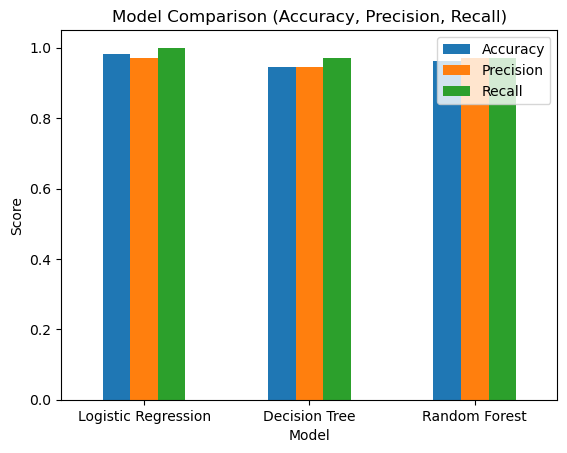

In [28]:
results_df.set_index("Model").plot(kind="bar")
plt.title("Model Comparison (Accuracy, Precision, Recall)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()